In [91]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from wordcloud import WordCloud
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc

In [92]:
train = pd.read_csv('/Users/somasunder_gss/Downloads/archive/Train.csv')
valid= pd.read_csv('/Users/somasunder_gss/Downloads/archive/Valid.csv')
test = pd.read_csv('/Users/somasunder_gss/Downloads/archive/Test.csv')

In [93]:
print(train.shape, test.shape, valid.shape)

(40000, 2) (5000, 2) (5000, 2)


In [94]:
train=pd.concat([train, valid], axis=0, ignore_index=True)

In [95]:
data=pd.concat([train, test], keys=['train', 'test'], axis=0)

In [96]:
print(data.shape)

(50000, 2)


In [97]:
data.head(10)

text  label
train 0  I grew up (b. 1965) watching and loving the Th...      0
      1  When I put this movie in my DVD player, and sa...      0
      2  Why do people who do not know what a particula...      0
      3  Even though I have great interest in Biblical ...      0
      4  Im a die hard Dads Army fan and nothing will e...      1
      5  A terrible movie as everyone has said. What ma...      0
      6  Finally watched this shocking movie last night...      1
      7  I caught this film on AZN on cable. It sounded...      0
      8  It may be the remake of 1987 Autumn's Tale aft...      1
      9  My Super Ex Girlfriend turned out to be a plea...      1

In [98]:
data.label.value_counts()

0    25000
1    25000
Name: label, dtype: int64

In [99]:
data = data.convert_dtypes()
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 50000 entries, ('train', 0) to ('test', 4999)
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    50000 non-null  string
 1   label   50000 non-null  Int64 
dtypes: Int64(1), string(1)
memory usage: 2.4+ MB


In [100]:
type(data)

pandas.core.frame.DataFrame

In [101]:
data['text'].iloc[10]

"I can't believe people are looking for a plot in this film. This is Laural and Hardy. Lighten up already. These two were a riot. Their comic genius is as funny today as it was 70 years ago. Not a filthy word out of either mouth and they were able to keep audiences in stitches. Their comedy wasn't sophisticated by any stretch. If a whoopee cushion can't make you grin, there's no reason to watch any of the stuff these guys did. It was a simpler time, and people laughed at stuff that was funny without a plot. I guess it takes a simple mind to enjoy this stuff, so I qualify. Two man comedy teams don't compute, We're just too sophisticated... Aren't we fortunate?"

In [143]:
from nltk.stem import PorterStemmer
stop_words = stopwords.words('english')
custom_stop_words = ['br']
stop_words = set(stop_words + custom_stop_words)
lemmatize = WordNetLemmatizer()

def preprocessor(text):
    filter_sentence = list()
    stop_words = set(stopwords.words('english') + custom_stop_words)
    sentence = text
    sentence = re.sub(r'[^\w\s]','',sentence)
    tokenize = nltk.word_tokenize(sentence)
    words = [w for w in tokenize if not w in stop_words]
    for w in words:
        filter_sentence.append(PorterStemmer().stem(w))
    return " ".join(filter_sentence)
data['text']=data['text'].apply(preprocessor)

train  0       grew b 1965 watch love thunderbird mate school...
       1       put movi dvd player sat coke chip expect hope ...
       2       whi peopl know particular time past like feel ...
       3       even though great interest biblic movi bore de...
       4       im die hard dad armi fan noth ever chang got t...
                                     ...                        
test   4995    thi kind pictur john lassit would make today w...
       4996    must see saw whip press screen hilari talk non...
       4997    nbc asham wouldnt allow children see definit w...
       4998    thi movi clumsi mishmash variou ghoststori sus...
       4999    formula movi illegitim son rich chilenian stan...
Name: text, Length: 50000, dtype: object

Text(0.5, 0, 'Length')

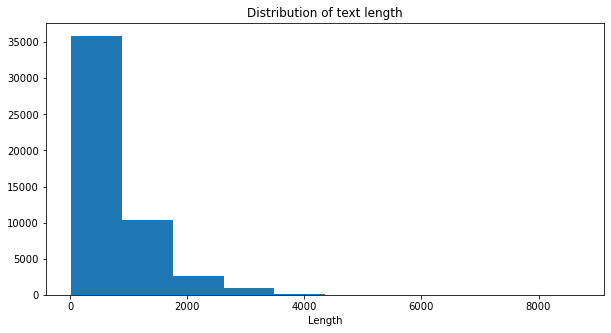

In [77]:
plt.figure(figsize=(10,5))
data_len = [len(l) for l in data['text']]
plt.hist(data_len)
plt.title('Distribution of text length')
plt.xlabel('Length')

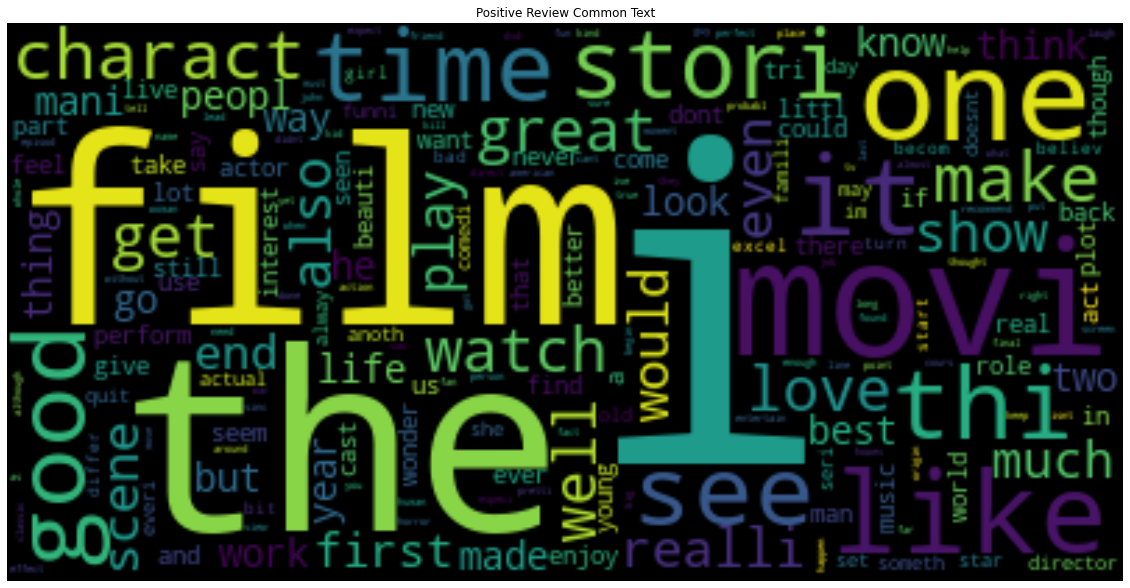

In [103]:
plt.figure(figsize=(20,20))
pos_freq = FreqDist(' '.join(data[data['label'] == 1].text).split(' '))
wc = WordCloud().generate_from_frequencies(frequencies=pos_freq)
plt.imshow(wc,interpolation='bilinear')
plt.title('Positive Review Common Text')
plt.axis('off')
plt.show()

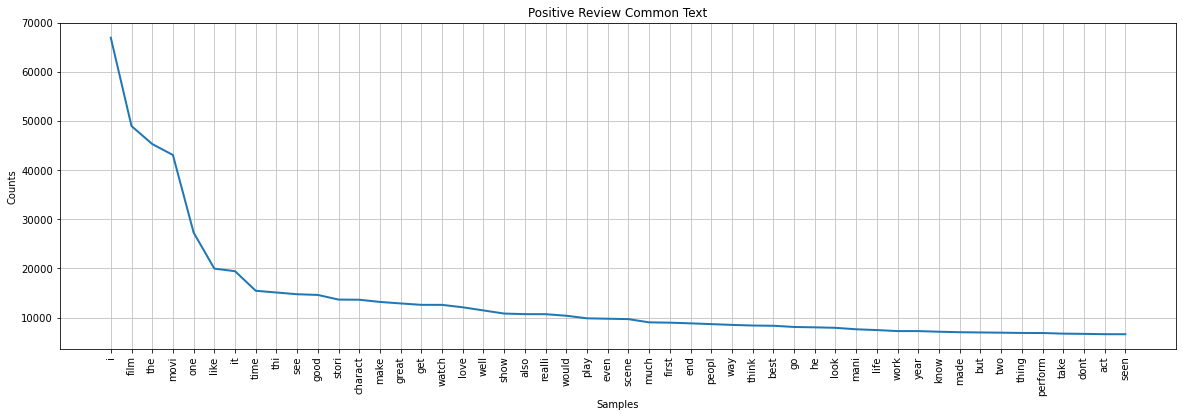

In [104]:
plt.figure(figsize=(20,6))
pos_freq.plot(50,cumulative=False,title='Positive Review Common Text')
plt.show()

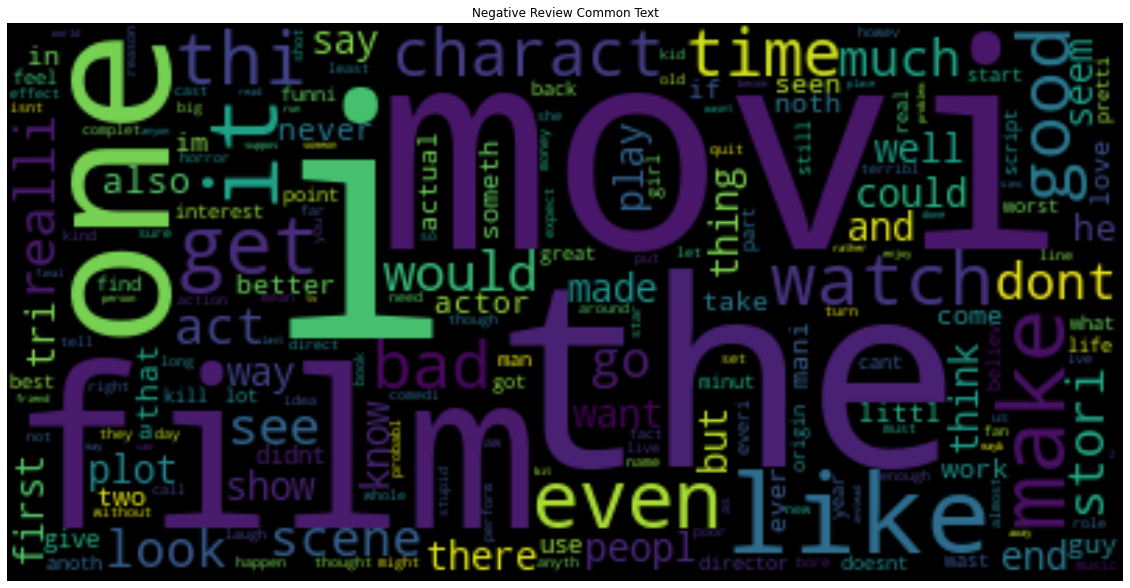

In [105]:
plt.figure(figsize=(20,20))
neg_freq = FreqDist(' '.join(data[data['label'] == 0].text).split(' '))
wc = WordCloud().generate_from_frequencies(frequencies=neg_freq)
plt.imshow(wc,interpolation='bilinear')
plt.title('Negative Review Common Text')
plt.axis('off')
plt.show()

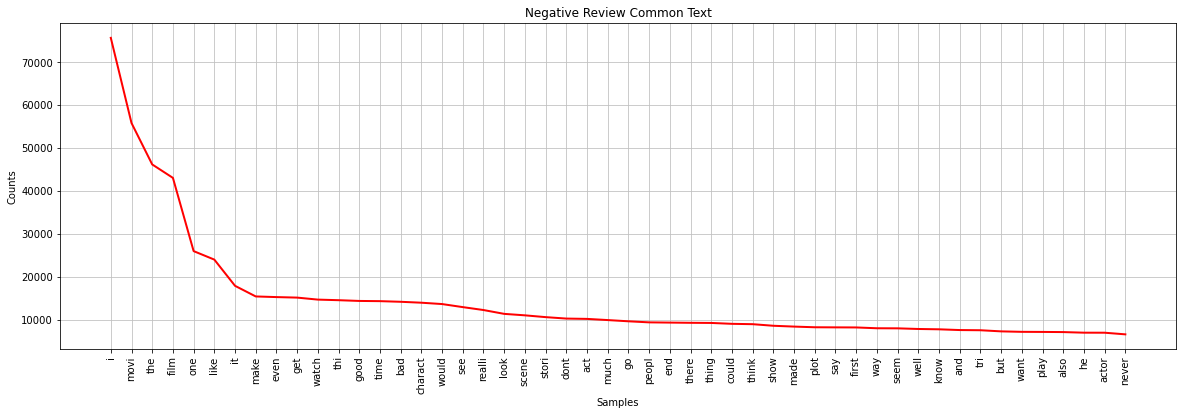

In [106]:
plt.figure(figsize=(20,6))
neg_freq.plot(50,cumulative=False,title='Negative Review Common Text',color='red')
plt.show()

In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X = data['text']
y = data['label']
y=y.astype('int')
X = tfidf.fit_transform(X)
X

<50000x141198 sparse matrix of type '<class 'numpy.float64'>'
	with 4798597 stored elements in Compressed Sparse Row format>

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

log_reg=LogisticRegression().fit(X_train, y_train)

In [150]:
train_score=round(log_reg.score(X_train, y_train),2)*100
test_score=round(log_reg.score(X_test, y_test),2)*100
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5035
           1       0.88      0.90      0.89      4965

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [151]:
print(confusion_matrix(y_test, y_pred)/len(y_test))

[[0.4453 0.0582]
 [0.0517 0.4448]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

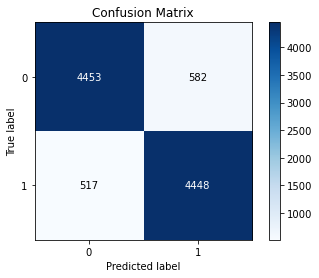

In [152]:
from scikitplot.metrics import plot_confusion_matrix
plot_confusion_matrix(y_test,y_pred)

In [153]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier().fit(X_train, y_train)
Y_pred=dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5035
           1       0.88      0.90      0.89      4965

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [154]:
print(confusion_matrix(y_test, y_pred)/len(y_test))

[[0.4453 0.0582]
 [0.0517 0.4448]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

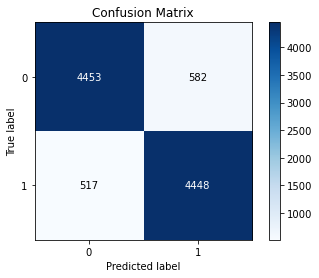

In [155]:
plot_confusion_matrix(y_test,y_pred)

In [156]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier().fit(X_train, y_train)
y_pred=knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76      5035
           1       0.74      0.85      0.79      4965

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.78      0.78     10000



In [157]:
print(confusion_matrix(y_test, y_pred)/len(y_test))

[[0.3548 0.1487]
 [0.0726 0.4239]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

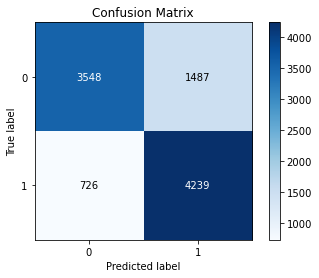

In [158]:
plot_confusion_matrix(y_test,y_pred)

In [146]:
def expression_check(prediction_input):
    if prediction_input == 0:
        print("Input statement has Negative Sentiment.")
    elif prediction_input == 1:
        print("Input statement has Positive Sentiment.")
    else:
        print("Invalid Statement.")


    
user_input = input("Your Review:")
text_input = [preprocessor(user_input)]
transformed_input = tfidf.fit_transform(text_input)
#Decision Tree has higher accuraccy in the models used. 
#We will be using this to predict the sentiment of the review.
prediction = dt.predict(transformed_input)
expression_check(prediction)


Your Review:The movie was slow but very good


ValueError: X has 4 features, but DecisionTreeClassifier is expecting 5000 features as input.